In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('C:/Users/Dell/Desktop/Assignments/Logistic Regression/bank-full.csv', delimiter = ';')

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
data.shape

(45211, 17)

In [13]:
#Checking the percentage of 'Yes' and 'No' for subscription
yes_sub = len(data[data['y'] == 'no'])
no_sub = len(data[data['y'] == 'yes'])
percentage_yes_sub = yes_sub/(yes_sub + no_sub)
percentage_no_sub = no_sub/(yes_sub + no_sub)
print('Percentage of yes subscription is:', percentage_yes_sub*100)
print('Percentage of no subscription is:', percentage_no_sub*100)

Percentage of yes subscription is: 88.30151954170445
Percentage of no subscription is: 11.698480458295547


In [14]:
#Checking for good predictors inside the dataset 

Text(0.5, 1.0, 'Education v/s Subscription')

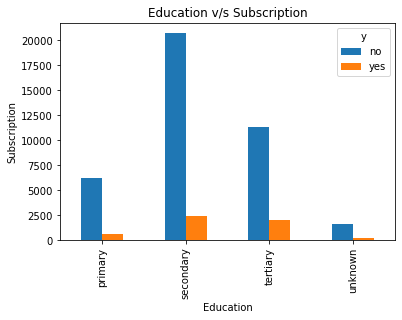

In [22]:
#Use cross tabulation to compare two factors
#Education
pd.crosstab(data.education, data.y).plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Subscription')
plt.title('Education v/s Subscription')
#Can be termed as a good predictor 

Text(0.5, 1.0, 'Marital Status v/s Subsciption')

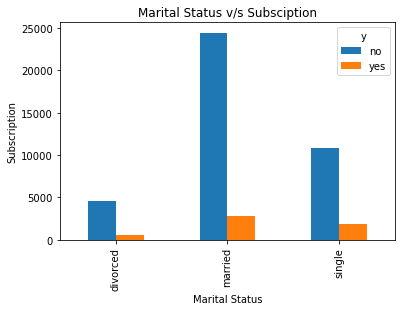

In [21]:
#Marital status
pd.crosstab(data.marital, data.y).plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Subscription')
plt.title('Marital Status v/s Subsciption')
#Can be dropped since it does not seem to be a good predictor

Text(0.5, 1.0, 'Day v/s Subscription')

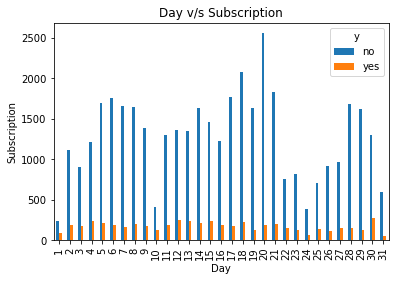

In [24]:
#Day
pd.crosstab(data.day, data.y).plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Subscription')
plt.title('Day v/s Subscription')
#Day is not a good predictor 

Text(0.5, 1.0, 'Outcome v/s Subscription')

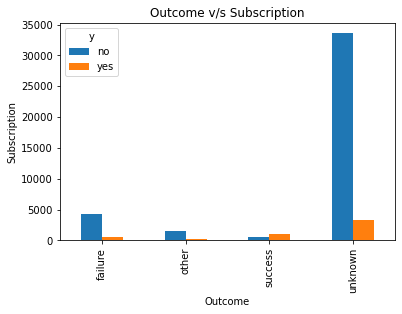

In [25]:
#Poutcome
pd.crosstab(data.poutcome, data.y).plot(kind='bar')
plt.xlabel('Outcome')
plt.ylabel('Subscription')
plt.title('Outcome v/s Subscription')
#Poutcome seems to be a good predictor

Text(0.5, 1.0, 'Default v/s Subscription')

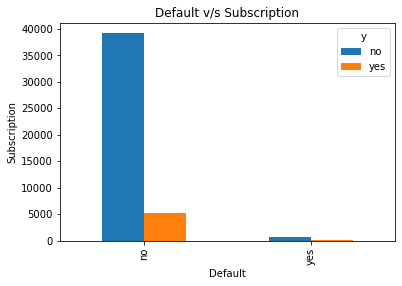

In [26]:
#Default
pd.crosstab(data.default,data.y).plot(kind='bar')
plt.xlabel('Default')
plt.ylabel('Subscription')
plt.title('Default v/s Subscription')
#Seems to be a good predictor

Text(0.5, 1.0, 'Housing v/s Subscription')

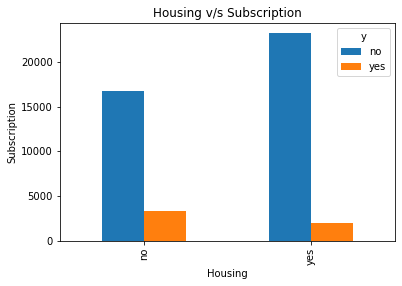

In [32]:
#Housing
pd.crosstab(data.housing, data.y).plot(kind='bar')
plt.xlabel('Housing')
plt.ylabel('Subscription')
plt.title('Housing v/s Subscription')
#Not a good predictor

In [33]:
#Dropping the bad predictors
data1 = data.drop(['day', 'marital', 'housing'], axis=1)
data1.head()

,age,job,education,default,balance,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,secondary,no,29,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,no,2,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,no,1506,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,unknown,no,1,no,unknown,may,198,1,-1,0,unknown,no


In [37]:
#Checking for duplicates
data1[data1.duplicated()].shape

(3, 14)

In [38]:
#Dropping duplicates
bank = data1.drop_duplicates()
bank.head()

,age,job,education,default,balance,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,no,unknown,may,261,1,-1,0,unknown,no
1,44,technician,secondary,no,29,no,unknown,may,151,1,-1,0,unknown,no
2,33,entrepreneur,secondary,no,2,yes,unknown,may,76,1,-1,0,unknown,no
3,47,blue-collar,unknown,no,1506,no,unknown,may,92,1,-1,0,unknown,no
4,33,unknown,unknown,no,1,no,unknown,may,198,1,-1,0,unknown,no


In [40]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45208 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45208 non-null  int64 
 1   job        45208 non-null  object
 2   education  45208 non-null  object
 3   default    45208 non-null  object
 4   balance    45208 non-null  int64 
 5   loan       45208 non-null  object
 6   contact    45208 non-null  object
 7   month      45208 non-null  object
 8   duration   45208 non-null  int64 
 9   campaign   45208 non-null  int64 
 10  pdays      45208 non-null  int64 
 11  previous   45208 non-null  int64 
 12  poutcome   45208 non-null  object
 13  y          45208 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [41]:
bank1 = pd.get_dummies(bank)
bank1.head()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,261,1,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,151,1,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,76,1,-1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,92,1,-1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,198,1,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [42]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45208 entries, 0 to 45210
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45208 non-null  int64
 1   balance              45208 non-null  int64
 2   duration             45208 non-null  int64
 3   campaign             45208 non-null  int64
 4   pdays                45208 non-null  int64
 5   previous             45208 non-null  int64
 6   job_admin.           45208 non-null  uint8
 7   job_blue-collar      45208 non-null  uint8
 8   job_entrepreneur     45208 non-null  uint8
 9   job_housemaid        45208 non-null  uint8
 10  job_management       45208 non-null  uint8
 11  job_retired          45208 non-null  uint8
 12  job_self-employed    45208 non-null  uint8
 13  job_services         45208 non-null  uint8
 14  job_student          45208 non-null  uint8
 15  job_technician       45208 non-null  uint8
 16  job_unemployed       4

In [56]:
#Assigning x and y values
x = bank1.iloc[:,:-2]
y = bank1.iloc[:,-1]

In [45]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x,y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred = LR.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [47]:
y_pred_df = pd.DataFrame({'Actual':y, 'Predicted Value':LR.predict(x)})
y_pred_df

,Actual,Predicted Value
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [50]:
#Checking accuracy with the help of a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39133   786]
 [ 4136  1153]]


In [49]:
(39133+1153)/(39133+1153+4136+786)

0.8911254645195541

In [52]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))
#Accuracy is 0.89

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39919
           1       0.59      0.22      0.32      5289

    accuracy                           0.89     45208
   macro avg       0.75      0.60      0.63     45208
weighted avg       0.87      0.89      0.87     45208



Text(0, 0.5, 'True Positive Rate')

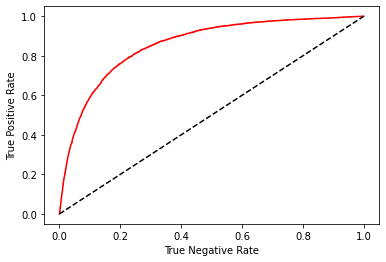

In [55]:
#Plotting the ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y, LR.predict_proba(x)[:,1]) 
auc = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr, color='red')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('True Negative Rate')
plt.ylabel('True Positive Rate')